## Identify outliers based on continuous data using the complete_patient spreadsheet

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
data.shape

(21818, 51)

In [5]:
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

### Random Forests on whole dataset

In [6]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

In [7]:
X=data[features]  # Features  
y=data['Severity']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [8]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4598991750687443


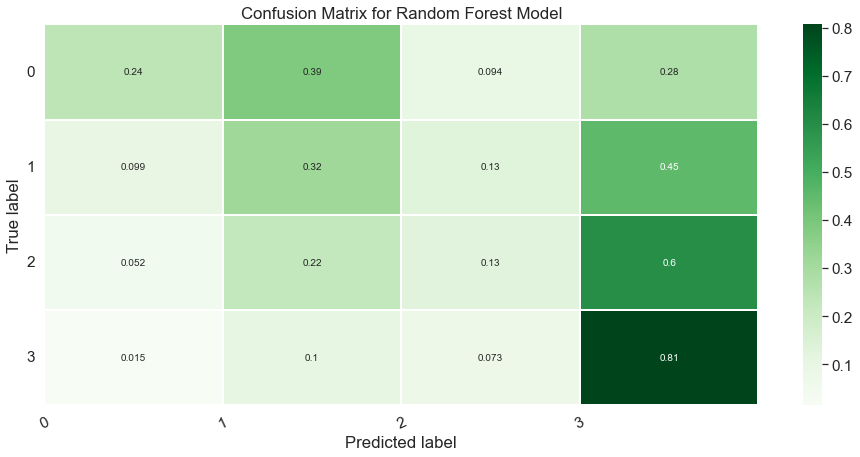

In [9]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0','1','2','3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [10]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 138,  221,   54,  159],
       [ 100,  318,  133,  456],
       [  53,  228,  133,  615],
       [  27,  182,  129, 1418]], dtype=int64)

#### Creating df that includes actual vs predicted severity

In [15]:
accuracy_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [18]:
accuracy_df = X_test.join(accuracy_df)

In [19]:
accuracy_df.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Actual,Predicted
24790,2.0,34.863792,0.0,0.0,0.0,168.0,86.0,37.0,97.0,120.0,...,1.0,0.0,0.0,0.0,0.0,5.0,15.0,2.0,0,0
118303,1.0,56.731006,0.0,0.0,1.0,157.0,78.0,40.0,98.0,125.0,...,1.0,1.0,0.0,1.0,0.0,19.0,24.0,13.0,1,3
100676,2.0,62.433949,0.0,0.0,0.0,150.0,55.0,34.0,92.0,135.0,...,1.0,1.0,0.0,0.0,0.0,21.0,17.0,0.0,3,3
114625,2.0,28.917180,0.0,0.0,0.0,163.0,89.0,41.0,115.0,120.0,...,1.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0,1
174909,2.0,55.748118,0.0,0.0,1.0,163.0,73.0,36.0,89.0,180.0,...,1.0,1.0,0.0,0.0,1.0,3.0,11.0,1.0,1,2


In [20]:
accuracy_df.shape

(4364, 51)

#### Adding a new column to accuracy_df to group incorrectly classified patients 
A0P1
A0P2
A0P3
A1P0
A1P2
A1P3
A2P0
A2P1
A2P3
A3P0
A3P1
A3P2

In [77]:
labels = []
for i in range(len(accuracy_df)):
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('A0P1')
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('A0P2')
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('A0P3')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('A1P0')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('A1P2')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('A1P3')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('A2P0')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('A2P1')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('A2P3')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('A3P0')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('A3P1')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('A3P2')
    if accuracy_df.iloc[i]['Actual'] == accuracy_df.iloc[i]['Predicted']:
        labels.append('correct')
    
   

In [79]:
accuracy_df['Labels']= labels
accuracy_df.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Actual,Predicted,Labels
24790,2.0,34.863792,0.0,0.0,0.0,168.0,86.0,37.0,97.0,120.0,...,0.0,0.0,0.0,0.0,5.0,15.0,2.0,0,0,correct
118303,1.0,56.731006,0.0,0.0,1.0,157.0,78.0,40.0,98.0,125.0,...,1.0,0.0,1.0,0.0,19.0,24.0,13.0,1,3,A1P3
100676,2.0,62.433949,0.0,0.0,0.0,150.0,55.0,34.0,92.0,135.0,...,1.0,0.0,0.0,0.0,21.0,17.0,0.0,3,3,correct
114625,2.0,28.917180,0.0,0.0,0.0,163.0,89.0,41.0,115.0,120.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0,1,A0P1
174909,2.0,55.748118,0.0,0.0,1.0,163.0,73.0,36.0,89.0,180.0,...,1.0,0.0,0.0,1.0,3.0,11.0,1.0,1,2,A1P2


[Text(0.5, 1.0, 'Age in correct vs incorrectly classified samples')]

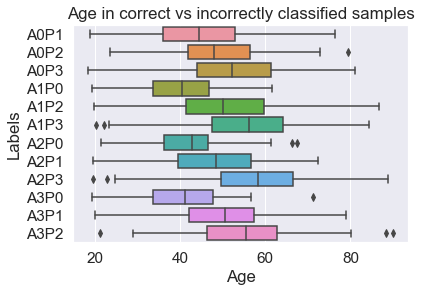

In [80]:
sns.boxplot(x = 'Age', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Age in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Height in correct vs incorrectly classified samples')]

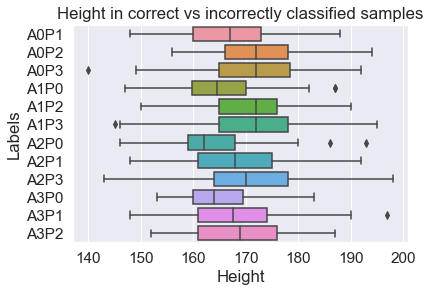

In [81]:
sns.boxplot(x = 'Height', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Height in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Weight in correct vs incorrectly classified samples')]

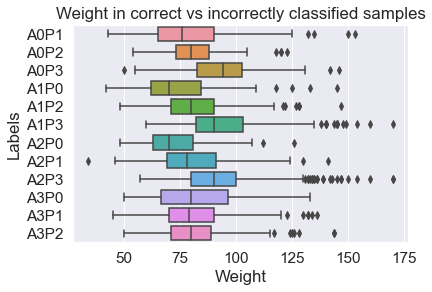

In [82]:
sns.boxplot(x = 'Weight', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Weight in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Cervical perimeter in correct vs incorrectly classified samples')]

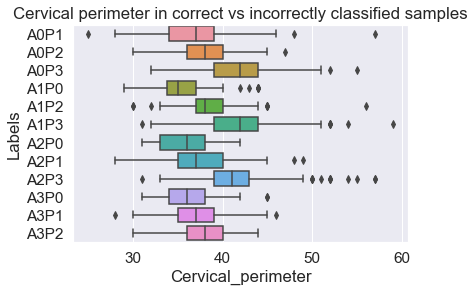

In [83]:
sns.boxplot(x = 'Cervical_perimeter', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Cervical perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Abdominal perimeter in correct vs incorrectly classified samples')]

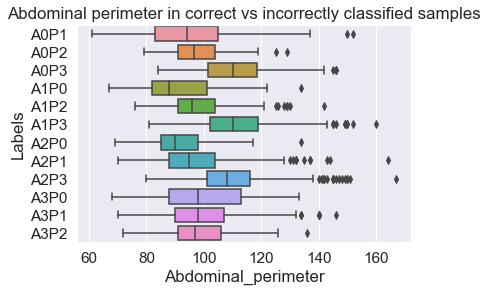

In [84]:
sns.boxplot(x = 'Abdominal_perimeter', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Abdominal perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'BMI in correct vs incorrectly classified samples')]

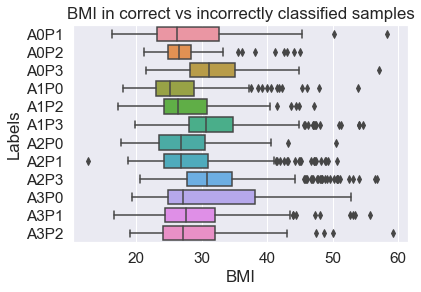

In [85]:
sns.boxplot(x = 'BMI', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='BMI in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Systolic BP in correct vs incorrectly classified samples')]

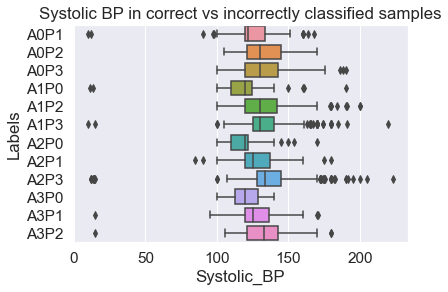

In [86]:
sns.boxplot(x = 'Systolic_BP', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Systolic BP in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Diastolic BP in correct vs incorrectly classified samples')]

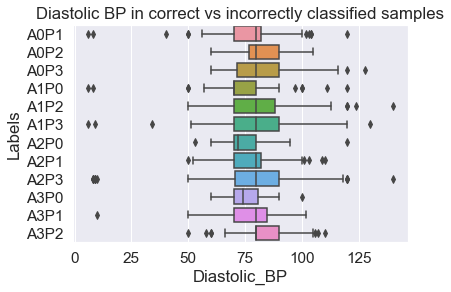

In [87]:
sns.boxplot(x = 'Diastolic_BP', y="Labels", data=accuracy_df, orient="h", order = ['A0P1','A0P2','A0P3','A1P0','A1P2','A1P3',
                                                                          'A2P0','A2P1','A2P3','A3P0','A3P1','A3P2']).set(title='Diastolic BP in correct vs incorrectly classified samples')

### Correct vs incorrectly predicted as same

In [50]:
# This shows samples that are correctly classified (Sev#)
#  next to cells that are predicted to have that same classification incorrectly
 

labels = []
for i in range(len(accuracy_df)):
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('Sev0')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('Sev1')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('Sev2')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('Sev3')
    if accuracy_df.iloc[i]['Actual'] != 0 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('Pred0')
    if accuracy_df.iloc[i]['Actual'] != 1 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('Pred1')
    if accuracy_df.iloc[i]['Actual'] != 2 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('Pred2')
    if accuracy_df.iloc[i]['Actual'] != 3 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('Pred3')
    
   

In [51]:
accuracy_df['Labels']= labels
accuracy_df.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Actual,Predicted,Labels
24790,2.0,34.863792,0.0,0.0,0.0,168.0,86.0,37.0,97.0,120.0,...,0.0,0.0,0.0,0.0,5.0,15.0,2.0,0,0,Sev0
118303,1.0,56.731006,0.0,0.0,1.0,157.0,78.0,40.0,98.0,125.0,...,1.0,0.0,1.0,0.0,19.0,24.0,13.0,1,3,Pred3
100676,2.0,62.433949,0.0,0.0,0.0,150.0,55.0,34.0,92.0,135.0,...,1.0,0.0,0.0,0.0,21.0,17.0,0.0,3,3,Sev3
114625,2.0,28.917180,0.0,0.0,0.0,163.0,89.0,41.0,115.0,120.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0,1,Pred1
174909,2.0,55.748118,0.0,0.0,1.0,163.0,73.0,36.0,89.0,180.0,...,1.0,0.0,0.0,1.0,3.0,11.0,1.0,1,2,Pred2


[Text(0.5, 1.0, 'Age in correct vs incorrectly classified samples')]

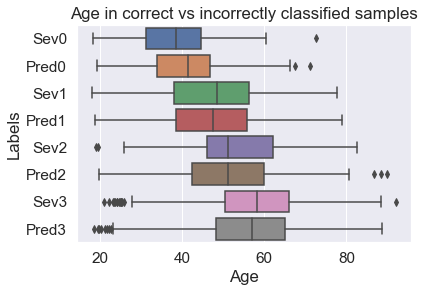

In [53]:
sns.boxplot(x = 'Age', y="Labels", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Age in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Height in correct vs incorrectly classified samples')]

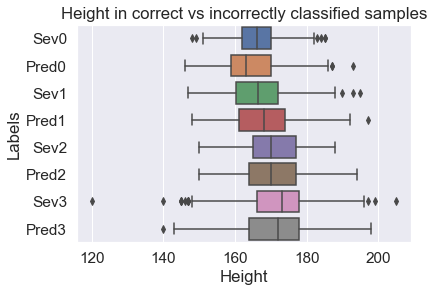

In [54]:
sns.boxplot(y = 'Labels', x="Height", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Height in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Weight in correct vs incorrectly classified samples')]

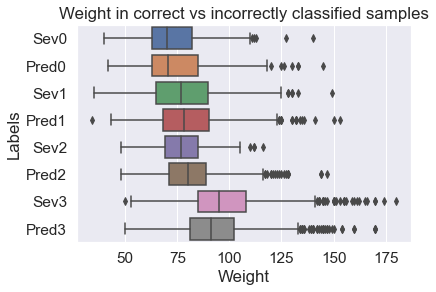

In [55]:
sns.boxplot(y = 'Labels', x="Weight", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Weight in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Cervical_perimeter in correct vs incorrectly classified samples')]

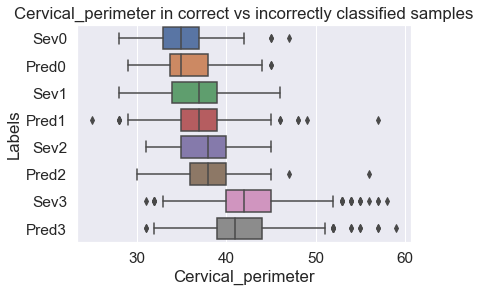

In [56]:
sns.boxplot(y = 'Labels', x="Cervical_perimeter", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Cervical_perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Abdominal_perimeter in correct vs incorrectly classified samples')]

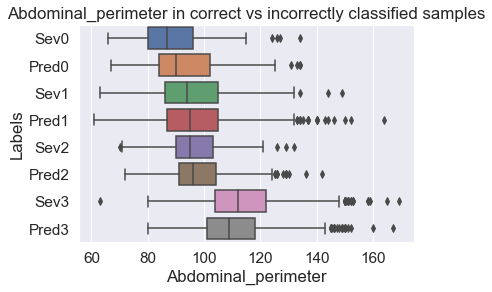

In [57]:
sns.boxplot(y = 'Labels', x="Abdominal_perimeter", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Abdominal_perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Systolic_BP in correct vs incorrectly classified samples')]

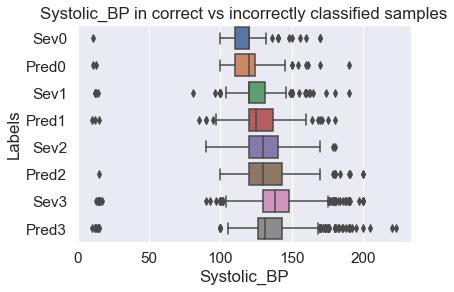

In [58]:
sns.boxplot(y = 'Labels', x="Systolic_BP", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Systolic_BP in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Diastolic_BP in correct vs incorrectly classified samples')]

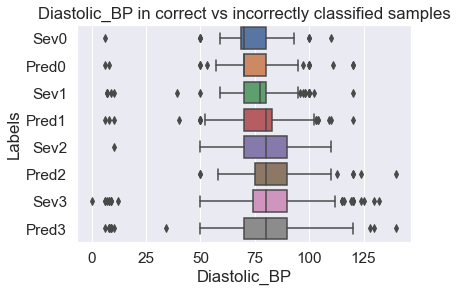

In [59]:
sns.boxplot(y = 'Labels', x="Diastolic_BP", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Diastolic_BP in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'BMI in correct vs incorrectly classified samples')]

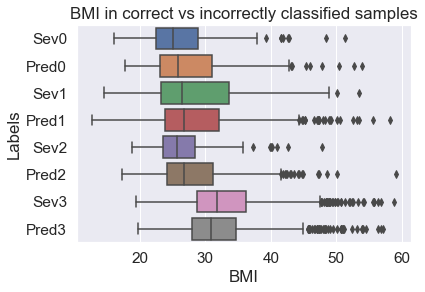

In [60]:
sns.boxplot(y = 'Labels', x="BMI", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='BMI in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Epworth_scale in correct vs incorrectly classified samples')]

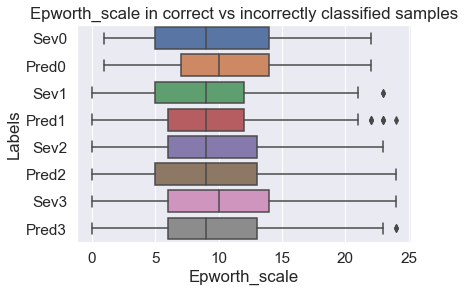

In [61]:
sns.boxplot(y = 'Labels', x="Epworth_scale", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Epworth_scale in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Pichots_scale in correct vs incorrectly classified samples')]

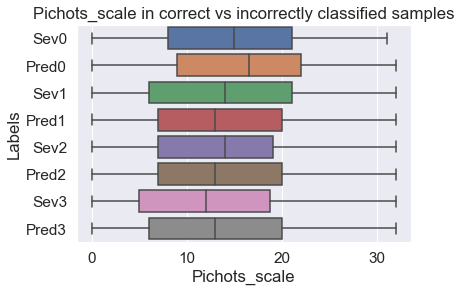

In [62]:
sns.boxplot(y = 'Labels', x="Pichots_scale", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Pichots_scale in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Depression_scale in correct vs incorrectly classified samples')]

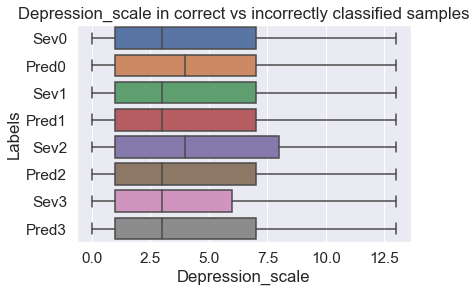

In [63]:
sns.boxplot(y = 'Labels', x="Depression_scale", data=accuracy_df, orient="h",  order=["Sev0", "Pred0","Sev1", "Pred1", "Sev2", "Pred2","Sev3", "Pred3"]).set(title='Depression_scale in correct vs incorrectly classified samples')

### Correct vs same severity but incorrectly classified

In [64]:
# This shows samples that are correctly classified (Sev#)
#  next to cells that are are actually the same severity but were incorrectly classified

labels = []
for i in range(len(accuracy_df)):
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] == 0:
        labels.append('Sev0_corr')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] == 1:
        labels.append('Sev1_corr')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] == 2:
        labels.append('Sev2_corr')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] == 3:
        labels.append('Sev3_corr')
    if accuracy_df.iloc[i]['Actual'] == 0 and accuracy_df.iloc[i]['Predicted'] != 0:
        labels.append('Sev0_inc')
    if accuracy_df.iloc[i]['Actual'] == 1 and accuracy_df.iloc[i]['Predicted'] != 1:
        labels.append('Sev1_inc')
    if accuracy_df.iloc[i]['Actual'] == 2 and accuracy_df.iloc[i]['Predicted'] != 2:
        labels.append('Sev2_inc')
    if accuracy_df.iloc[i]['Actual'] == 3 and accuracy_df.iloc[i]['Predicted'] != 3:
        labels.append('Sev3_inc')
    
   

In [65]:
accuracy_df['Labels']= labels
accuracy_df.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Actual,Predicted,Labels
24790,2.0,34.863792,0.0,0.0,0.0,168.0,86.0,37.0,97.0,120.0,...,0.0,0.0,0.0,0.0,5.0,15.0,2.0,0,0,Sev0_corr
118303,1.0,56.731006,0.0,0.0,1.0,157.0,78.0,40.0,98.0,125.0,...,1.0,0.0,1.0,0.0,19.0,24.0,13.0,1,3,Sev1_inc
100676,2.0,62.433949,0.0,0.0,0.0,150.0,55.0,34.0,92.0,135.0,...,1.0,0.0,0.0,0.0,21.0,17.0,0.0,3,3,Sev3_corr
114625,2.0,28.917180,0.0,0.0,0.0,163.0,89.0,41.0,115.0,120.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0,1,Sev0_inc
174909,2.0,55.748118,0.0,0.0,1.0,163.0,73.0,36.0,89.0,180.0,...,1.0,0.0,0.0,1.0,3.0,11.0,1.0,1,2,Sev1_inc


[Text(0.5, 1.0, 'Age in correct vs incorrectly classified samples')]

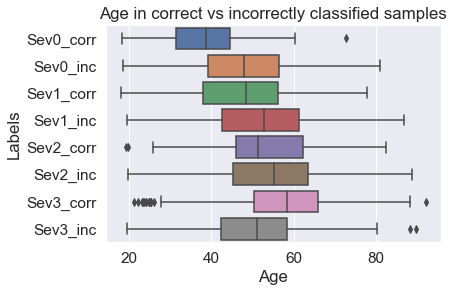

In [66]:
sns.boxplot(x = 'Age', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Age in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Height in correct vs incorrectly classified samples')]

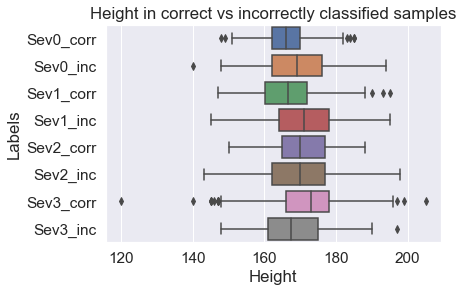

In [67]:
sns.boxplot(x = 'Height', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Height in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Weight in correct vs incorrectly classified samples')]

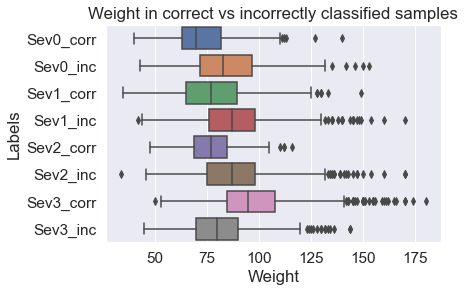

In [68]:
sns.boxplot(x = 'Weight', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Weight in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Cervial Perimeter in correct vs incorrectly classified samples')]

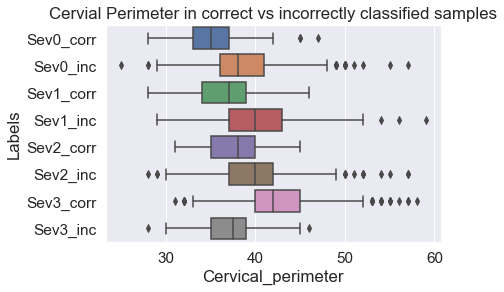

In [69]:
sns.boxplot(x = 'Cervical_perimeter', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Cervial Perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Abdominal perimeter in correct vs incorrectly classified samples')]

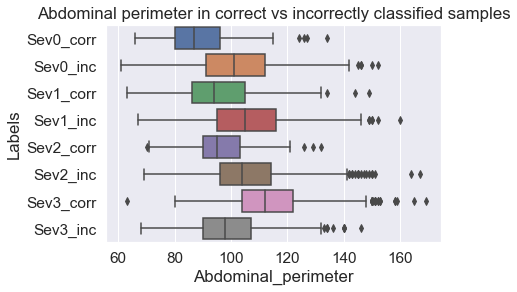

In [70]:
sns.boxplot(x = 'Abdominal_perimeter', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Abdominal perimeter in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Systolic BP in correct vs incorrectly classified samples')]

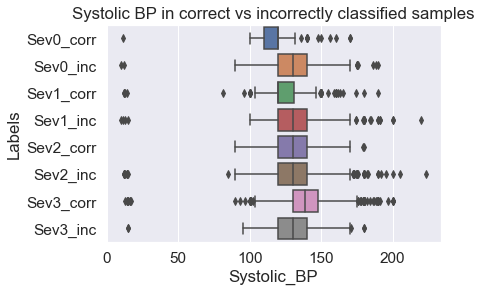

In [71]:
sns.boxplot(x = 'Systolic_BP', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Systolic BP in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Diastolic BP in correct vs incorrectly classified samples')]

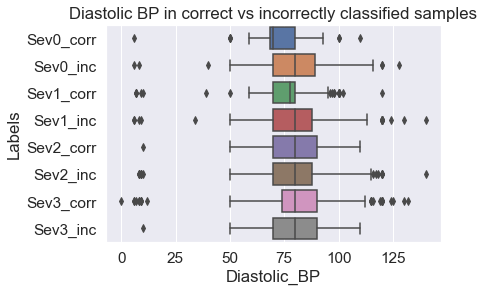

In [72]:
sns.boxplot(x = 'Diastolic_BP', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Diastolic BP in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'BMI in correct vs incorrectly classified samples')]

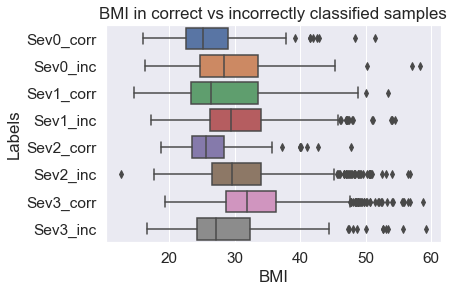

In [73]:
sns.boxplot(x = 'BMI', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='BMI in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Epworth scale in correct vs incorrectly classified samples')]

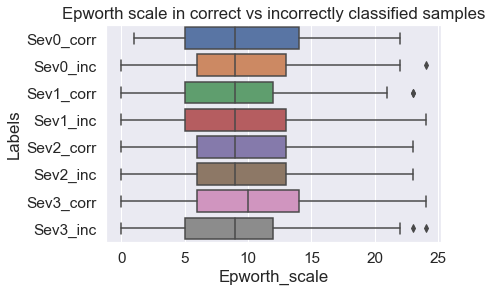

In [74]:
sns.boxplot(x = 'Epworth_scale', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Epworth scale in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Pichots scale in correct vs incorrectly classified samples')]

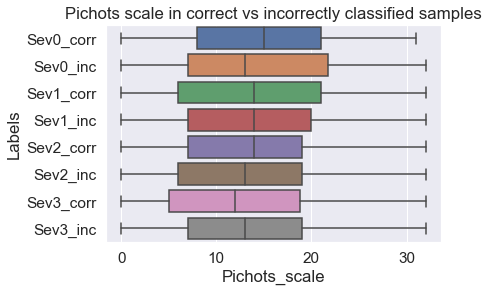

In [75]:
sns.boxplot(x = 'Pichots_scale', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Pichots scale in correct vs incorrectly classified samples')

[Text(0.5, 1.0, 'Depression scale in correct vs incorrectly classified samples')]

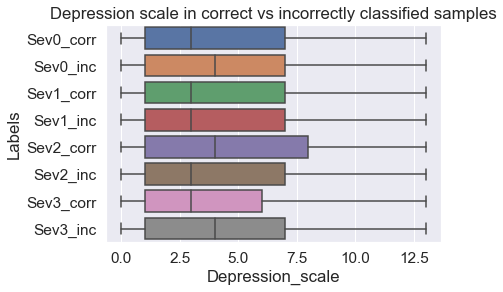

In [76]:
sns.boxplot(x = 'Depression_scale', y="Labels", data=accuracy_df, orient="h",  order=["Sev0_corr", "Sev0_inc","Sev1_corr", "Sev1_inc","Sev2_corr", "Sev2_inc","Sev3_corr", "Sev3_inc"]).set(title='Depression scale in correct vs incorrectly classified samples')